In [2]:
# 0 - Pro CAA
# 1 - Against CAA
import numpy as np
import pandas as pd

In [3]:
#load csv file
train_set = pd.read_csv("../input/twitter-sentiment-analysis-dataset/train.csv")
data = train_set
data.head()

,id,label,tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...


In [4]:
test_set = pd.read_csv("../input/twitter-sentiment-analysis-dataset/test.csv")
test_data = test_set
test_data.head()

,id,tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...


In [5]:
data.label.value_counts()

0    285
1    217
Name: label, dtype: int64

In [6]:
data.shape

(502, 3)

In [7]:
data['label'].value_counts()

0    285
1    217
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


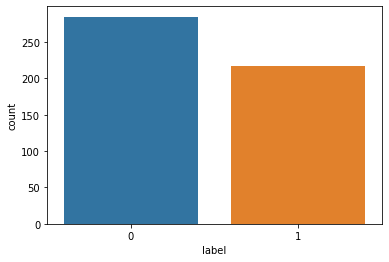

In [8]:
import seaborn as sns
ax=sns.countplot(data.label)

In [9]:
# removing usernames from tweet

data['new_tweet'] = data.tweet.str.replace('@[^\s]+', '')
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it's due.Inspite of not re...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"RT And radical mobs in India protests CAA, k..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,we r happy for Sunak.\nCAA &amp; NRC is not d...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,I dont understand y everyone is suddenly so...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...


In [10]:
# removing usernames from test_data

test_data['new_tweet'] = test_data.tweet.str.replace('@[^\s]+', '')
test_data.head()
ids = test_data['id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
# data['new_tweet'] = data['new_tweet'].str.replace("amp", "and")
data.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it s due Inspite of not re...
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,RT And radical mobs in India protests CAA k...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,we r happy for Sunak CAA amp NRC is not di...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,I dont understand y everyone is suddenly so...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...


In [12]:
test_data['new_tweet'] = test_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
test_data['new_tweet'] = test_data['new_tweet'].str.replace("#", "")
test_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,RT Credit where it s due Inspite of not re...
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,RT Proud moment that UK will have its first I...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,RT It has been days since the movement a...
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,Just as Israel is the land and safe have...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,RT And radical mobs in India protests CAA k...


In [13]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('india', 495),
 ('in', 393),
 ('caa', 353),
 ('of', 348),
 ('the', 341),
 ('rt', 337),
 ('is', 259),
 ('that', 220),
 ('it', 213),
 ('to', 178)]

In [14]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, Credit, where, it, s, due, Inspite, of, n..."
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, And, radical, mobs, in, India, protests, ..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[we, r, happy, for, Sunak, CAA, amp, NRC, is, ..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[I, dont, understand, y, everyone, is, suddenl..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, Proud, moment, that, UK, will, have, its,..."


In [15]:
test_data['new_tweet'] = test_data['new_tweet'].apply(lambda x: x.split())
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, Credit, where, it, s, due, Inspite, of, n..."
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, Proud, moment, that, UK, will, have, its,..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[RT, It, has, been, days, since, the, movement..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[Just, as, Israel, is, the, land, and, safe, h..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, And, radical, mobs, in, India, protests, ..."


In [16]:
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, credit, where, it, s, due, inspit, of, no..."
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, and, radic, mob, in, india, protest, caa,..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[we, r, happi, for, sunak, caa, amp, nrc, is, ..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[I, dont, understand, y, everyon, is, suddenli..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, proud, moment, that, UK, will, have, it, ..."


In [17]:
test_data['new_tweet']= test_data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[RT, credit, where, it, s, due, inspit, of, no..."
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[RT, proud, moment, that, UK, will, have, it, ..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[RT, It, ha, been, day, sinc, the, movement, a..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[just, as, israel, is, the, land, and, safe, h..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[RT, and, radic, mob, in, india, protest, caa,..."


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [20]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)


In [21]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [22]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[read, draft, caa, rt, due, inspit, nrc, credit]"
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,"[well, countri, radic, mob, know, treatment, h..."
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,"[bd, co, nrc, goi, result, minor, r, come, sun..."
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,"[dure, gang, extrem, row, part, toolkit, smitt..."
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,"[proud, rightli, indian, origin, india, celebr..."


In [23]:
# test_data
test_data['new_tweet'] = test_data['new_tweet'].apply(process) 
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,"[read, draft, caa, rt, due, inspit, nrc, credit]"
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,"[proud, rightli, indian, origin, india, celebr..."
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,"[movement, imam, caa, sharjeel, rt, ha, sinc, ..."
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,"[jain, thi, israel, indian, irrespect, offshoo..."
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,"[well, countri, radic, mob, know, treatment, h..."


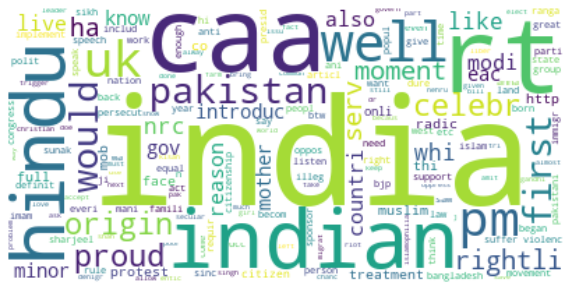

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1.586110e+18,0,RT @Informaticafan: @ReallySwara @RahulGandhi ...,read draft caa rt due inspit nrc credit
1,1.585310e+18,0,RT @ThePollLady: @AskAnshul And radical mobs i...,well countri radic mob know treatment hindu ca...
2,1.584580e+18,0,@MehboobaMufti we r happy for Sunak.\nCAA &amp...,bd co nrc goi result minor r come sunak want n...
3,1.585470e+18,0,@Wine_Sommelier_ @bakshi_arnab @onty4u I dont ...,dure gang extrem row part toolkit smitten farm...
4,1.584940e+18,1,RT @MehboobaMufti: Proud moment that UK will h...,proud rightli indian origin india celebr uk pm...


In [26]:
test_data['new_tweet'] = test_data['new_tweet'].apply(string)
test_data.head()

,id,tweet,new_tweet
0,1.586110e+18,RT @Informaticafan: @ReallySwara @RahulGandhi ...,read draft caa rt due inspit nrc credit
1,1.584840e+18,RT @MehboobaMufti: Proud moment that UK will h...,proud rightli indian origin india celebr uk pm...
2,1.584200e+18,RT @MaktoobMedia: It has been 1078 days since ...,movement imam caa sharjeel rt ha sinc india began
3,1.585300e+18,@mubbusshira @Aryavrat19 @rohitdhavan @Unknown...,jain thi israel indian irrespect offshoot land...
4,1.585290e+18,RT @ThePollLady: @AskAnshul And radical mobs i...,well countri radic mob know treatment hindu ca...


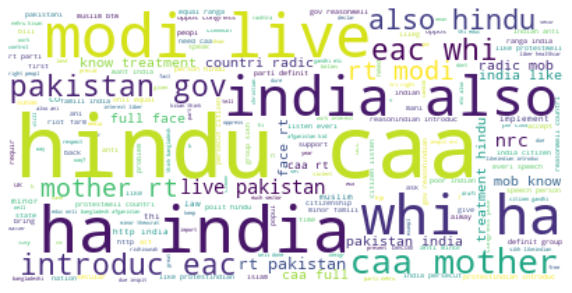

In [27]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

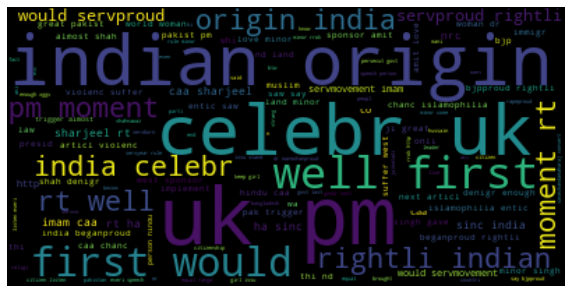

In [28]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words 

In [29]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,read draft caa rt due inspit nrc credit
1,0,well countri radic mob know treatment hindu ca...
2,0,bd co nrc goi result minor r come sunak want n...
3,0,dure gang extrem row part toolkit smitten farm...
4,1,proud rightli indian origin india celebr uk pm...


In [30]:
test_data.drop(["id","tweet" ],axis=1,inplace=True)
test_data.head()

,new_tweet
0,read draft caa rt due inspit nrc credit
1,proud rightli indian origin india celebr uk pm...
2,movement imam caa sharjeel rt ha sinc india began
3,jain thi israel indian irrespect offshoot land...
4,well countri radic mob know treatment hindu ca...


In [31]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (401,) (401,)
testing set : (101,) (101,)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [33]:
test_x = test_data['new_tweet']
test_x

0                read draft caa rt due inspit nrc credit
1      proud rightli indian origin india celebr uk pm...
2      movement imam caa sharjeel rt ha sinc india began
3      jain thi israel indian irrespect offshoot land...
4      well countri radic mob know treatment hindu ca...
                             ...                        
122    indian introduc eac whi ha india also hindu ca...
123    hoga thi chang time inde caa india mention bhi...
124    rishi look indian countri whi smart want india...
125    allow jain comprehens refuge onli financi st c...
126    polit kharagpur opposit currenc improv condit ...
Name: new_tweet, Length: 127, dtype: object

In [34]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(401, 1131)
(401, 1131)


In [35]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)

print(test_x_counts.shape)
print(test_x_tfidf.shape)

(127, 1131)
(127, 1131)


In [36]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(101, 1131)
(101, 1131)


### Model building

#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
predictions = model.predict(x_test_tfidf)

In [39]:
submission  = model.predict(test_x_tfidf)

In [40]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

90.0990099009901

In [41]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[59,  1],
       [ 9, 32]])

In [42]:
#f1-score
f1_score(y_test,predictions)

0.8648648648648648

In [43]:
from __future__ import print_function


# Special END separator
END = '0e8ed89a-47ba-4cdb-938e-b8af8e084d5c'

# Text attributes
ALL_OFF = '\033[0m'
BOLD = '\033[1m'
UNDERSCORE = '\033[4m'
BLINK = '\033[5m'
REVERSE = '\033[7m'
CONCEALED = '\033[7m'

# Foreground colors
FG_BLACK = '\033[30m'
FG_RED = '\033[31m'
FG_GREEN = '\033[32m'
FG_YELLOW = '\033[33m'
FG_BLUE = '\033[34m'
FG_MAGENTA = '\033[35m'
FG_CYAN = '\033[36m'
FG_WHITE = '\033[37m'

# Background colors
BG_BLACK = '\033[40m'
BG_RED = '\033[41m'
BG_GREEN = '\033[42m'
BG_YELLOW = '\033[43m'
BG_BLUE = '\033[44m'
BG_MAGENTA = '\033[45m'
BG_CYAN = '\033[46m'
BG_WHITE = '\033[47m'


class pretty_output():
    '''
    Context manager for pretty terminal prints
    '''

    def __init__(self, *attr):
        self.attributes = attr

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        pass

    def write(self, msg):
        style = ''.join(self.attributes)
        print('{}{}{}'.format(style, msg.replace(END, ALL_OFF + style), ALL_OFF))


if __name__ == '__main__':

    with pretty_output(FG_RED) as out:
        out.write('This is a test in RED')

    with pretty_output(FG_BLUE) as out:
        out.write('This is a test in BLUE')

    with pretty_output(BOLD, FG_GREEN) as out:
        out.write('This is a bold text in green')

    with pretty_output(BOLD, BG_GREEN) as out:
        out.write('This is a text with green background')

    with pretty_output(FG_GREEN) as out:
        out.write('This is a green text with ' + BOLD + 'bold' + END + ' text included')

    with pretty_output() as out:
        out.write(BOLD + 'Use this' + END + ' even with ' + BOLD + FG_RED + 'no parameters' + END + ' in the with statement')

This is a test in RED
This is a test in BLUE
This is a bold text in green
This is a text with green background
This is a green text with bold text included
Use this even with no parameters in the with statement


In [44]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T

with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST                 ')
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'],)


                 RANDOM FOREST                 


,precision,recall,f1-score,support
0,0.983333,0.867647,0.921875,68.000000
1,0.780488,0.969697,0.864865,33.000000
accuracy,0.900990,0.900990,0.900990,0.900990
macro avg,0.881911,0.918672,0.893370,101.000000
weighted avg,0.917057,0.900990,0.903248,101.000000


In [45]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [46]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Label'])
tweets['Tweets'] = x_test
tweets['Prediction'] = predictions
tweets['Label'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
with pretty_output(BOLD, FG_GREEN) as out:
    out.write('                 RANDOM FOREST Tweets Prediction                ')
(tweets.sample(10).style.applymap(color_negative_red, subset=['Prediction', 'Label']))

                 RANDOM FOREST Tweets Prediction                


,Tweets,Prediction,Label
472,institut lml co prevent dissolv nrc like law countri common thank code hour dat http n v absolut civil divis waqf rrem need caa highlight board uniform,POS,POS
296,proud rightli indian origin india celebr uk pm moment rt well first would serv,NEG,NEG
15,proud rightli indian origin india celebr uk pm moment rt well first would serv,NEG,NEG
411,use visit bihar cook detect ga pol digicam cloud tea fake climat singh plane want india gandhi spread radar caa detent sc alexand nehru gutter jail entir camp chang bhagat came news,POS,POS
9,thr elect studi nrc depriv like ethnic countri hs minor intoler n india fact rs legitim noth whch right capabl ani need uk pm caa othr protect,POS,POS
131,minor citizenship caa rt persecut n give,NEG,POS
154,prove co pi done anyon nrc land name http alreadi india nation islam non bharat xzrlri given huge need anyth caa prime evid bring muslim requir minist protect,POS,POS
69,provid co thi articl suprem attent r lf befor http alreadi fact know smg petit month mani court pend file sinc,NEG,NEG
182,indian introduc eac whi ha india also hindu caa mother rt modi live pakistan gov reason,POS,POS
278,mouth nrc alway b shut india keep matter caa rt riot delhi hi,POS,POS


In [47]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [48]:
test_data.head()

,new_tweet
0,read draft caa rt due inspit nrc credit
1,proud rightli indian origin india celebr uk pm...
2,movement imam caa sharjeel rt ha sinc india began
3,jain thi israel indian irrespect offshoot land...
4,well countri radic mob know treatment hindu ca...


In [49]:
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0


In [50]:
submission_df.to_csv('submission.csv',index=False)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [52]:
log_predictions = logmodel.predict(x_test_tfidf)

In [53]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[60,  0],
       [10, 31]])

In [54]:
f1_score(y_test,log_predictions)

0.8611111111111112

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

90.0990099009901

In [56]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission-log.csv',index=False)
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0


### Gradient Boosting Regressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(n_estimators=550)

In [58]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [59]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[60,  0],
       [10, 31]])

In [60]:
f1_score(y_test,alg_predictions)

0.8611111111111112

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,alg_predictions)*100

90.0990099009901

In [62]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


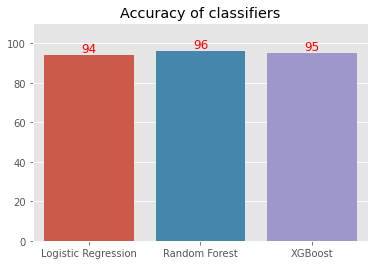

In [63]:
models = ["Logistic Regression", 'Random Forest', 'XGBoost']
acc = [94, 96, 95]
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.barplot(models, acc, );
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = 110 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
plt.title('Accuracy of classifiers')
plt.show()

In [64]:
submission  = model.predict(test_x_tfidf)
submission_df = pd.DataFrame(columns=['id', 'label'])
submission_df['id'] = ids
submission_df['label'] = submission
submission_df.to_csv('submission_gb.csv',index=False)
submission_df.head(5)

,id,label
0,1.586110e+18,0
1,1.584840e+18,1
2,1.584200e+18,1
3,1.585300e+18,0
4,1.585290e+18,0
